In [2]:
# -*- coding: utf-8 -*-
import sys
import os

rootPath = 'D:/FundResearch/'
sys.path.append(rootPath)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import quant_utils.data_moudle as dm
from quant_utils.constant import DB_CONN_JJTG_DATA
import data_functions.fund_data as dfs
import data_functions.portfolio_data as pds
from quant_utils.performance import Performance
from quant_utils.utils import read_tdx_1min, change_1min_to_mins

In [28]:
trade_dts = dm.get_period_end_date(
    start_date="20200101",
    end_date="20231204",
    period="w"
)

In [29]:
df_list = []
for dt in trade_dts:
    df_list.append(
        dfs.cal_enhanced_index_fund_alpha_total_score(
            end_date=dt,
            period="1Y", 
            indicator_name_weights={"IR": 0.3, "ALPHA": 0.4, "MAXDD": 0.3,},
            indicator_period_weights={
                "3M": 0.2, 
                "6M": 0.3, 
                "1Y": 0.4, 
            }
        )
    )

In [32]:
df = pd.concat(df_list)

<Axes: xlabel='END_DATE'>

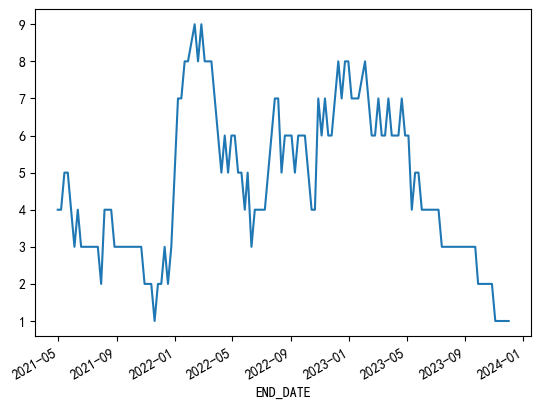

In [53]:
temp = df.query("TICKER_SYMBOL == '502000'")
temp = temp.set_index(pd.to_datetime(temp.END_DATE))
temp["TOTAL_SCORE_GROUP"].plot()